# Hysteresis Loops Fitting

In [1]:
import sys
sys.path.append('../../')
sys.path.append("/home/ferroelectric/m3_learning/m3_learning/src")

In [2]:
%load_ext autoreload
%autoreload 2

import h5py
import pyUSID as usid

from src.m3_learning.be.processing import fit_loop_function, loop_lsqf

import numpy as np

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset
from m3_learning.be.nn import SHO_fit_func_nn, SHO_Model
from m3_learning.nn.Fitter1D.Fitter1D import Multiscale1DFitter, Model

printing = printer(basepath = './Figures/')


set_style("printing")
random_seed(seed=42)

%matplotlib inline

2023-08-09 21:31:59.368280: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 21:31:59.486428: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-09 21:31:59.890159: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/cv2/../../lib64:
2023-08-09 21:31:59.890209: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libr

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Loads data

In [3]:
# Specify the filename and the path to save the file
filename = "data_raw_SHO.h5"
save_path = "./Data"


data_path = save_path + "/" + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, resample_bins=None, SHO_fit_func_NN=SHO_fit_func_nn,
                     )

# print the contents of the file
dataset.print_be_tree()

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Noisy_Data_1
    ├ Noisy_Data_2
    ├ Noisy_Data_3
    ├ Noisy_Data_4
    ├ Noisy_Data_5
    ├ Noisy_Data_6
    ├ Noisy_Data_7
    ├ Noisy_Data_8
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
├ Noisy_Data_1_SHO_Fit
  --------

## Performs fits

In [4]:
h5_loop_fit, h5_loop_group = dataset.LSQF_Loop_Fit()

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file

Note: Loop_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000" (11 members)>]

Note: Loop_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000" (11 members)>]
Returned previously computed results at /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000

Note: Loop_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_0

/home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/pyUSID/io/hdf_utils/simple.py:888: UserWarning: A dataset named: Guess_Loop_Parameters already exists in group: /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000
  warn('A dataset named: {} already exists in group: {}'.format(dset_name, h5_group.name))
/home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/pyUSID/io/hdf_utils/simple.py:888: UserWarning: A dataset named: Fit_Loop_Parameters already exists in group: /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000
  warn('A dataset named: {} already exists in group: {}'.format(dset_name, h5_group.name))


In [83]:
out, bias = dataset.get_hysteresis("/Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000", plotting_values=False)

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Spectroscopic_Values


In [50]:
parm.view('<f4')

array([ 8.0226555e+00, -5.6712832e+00,  1.1756861e+00,  8.7097047e-05,
       -8.9068890e-05,  1.7616594e-04,  2.4124056e-03,  2.0734806e+00,
       -2.9675412e+00], dtype=float32)

In [85]:
pos = np.random.randint(0, 3600, 1)
cycle = pos = np.random.randint(0, 4, 1)

parm = dataset.LSQF_hysteresis_params()[pos,cycle].view('<f4')

loop = loop_fitting_function_torch(bias[:, cycle], parm, type='9 parameters')

/home/ferroelectric/m3_learning/m3_learning/src/m3_learning/be/loop_fitter.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  f1 = a0 + a1 * y1 + a4 * V1
/home/ferroelectric/m3_learning/m3_learning/src/m3_learning/be/loop_fitter.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  f2 = a0 + a1 * y2 + a4 * V2


In [86]:
from scipy.special import erf, erfinv
import warnings

def loop_fit_function(vdc, coef_vec):
    """
    9 parameter fit function
    
    Parameters
    -----------
    vdc : 1D numpy array or list
        DC voltages
    coef_vec : 1D numpy array or list
        9 parameter coefficient vector
        
    Returns
    ---------
    loop_eval : 1D numpy array
        Loop values
    """

    a = coef_vec[:5]
    b = coef_vec[5:]
    d = 1000

    v1 = np.asarray(vdc[:int(len(vdc) / 2)])
    v2 = np.asarray(vdc[int(len(vdc) / 2):])

    g1 = (b[1] - b[0]) / 2 * (erf((v1 - a[2]) * d) + 1) + b[0]
    g2 = (b[3] - b[2]) / 2 * (erf((v2 - a[3]) * d) + 1) + b[2]

    y1 = (g1 * erf((v1 - a[2]) / g1) + b[0]) / (b[0] + b[1])
    y2 = (g2 * erf((v2 - a[3]) / g2) + b[2]) / (b[2] + b[3])

    f1 = a[0] + a[1] * y1 + a[4] * v1
    f2 = a[0] + a[1] * y2 + a[4] * v2

    loop_eval = np.hstack((f1, f2))
    return loop_eval

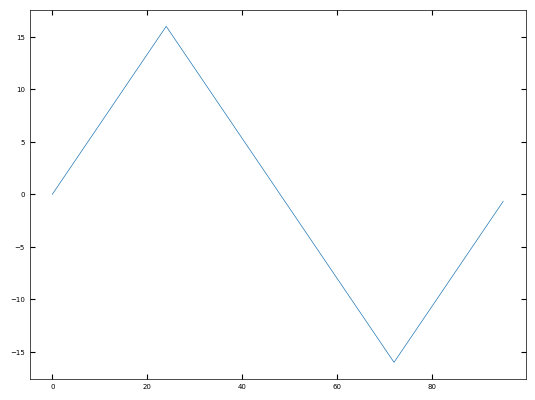

In [89]:
plt.plot(bias[:,0])

In [87]:
loop_eval = loop_fit_function(bias[:,0], parm)

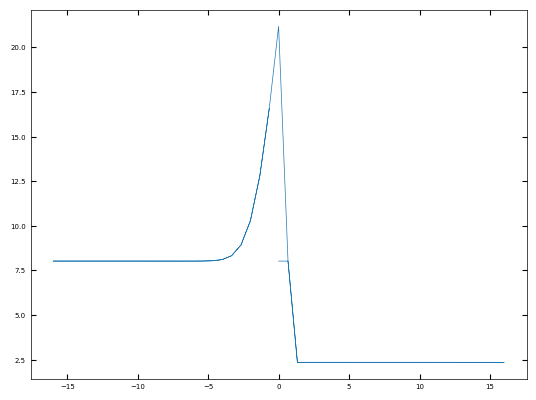

In [88]:
plt.plot(bias[:,cycle].squeeze(), loop_eval)

In [22]:
dataset.LSQF_hysteresis_params()[0,0]

(9.112893, -9.489103, -0.1881051, 6.126856e-05, -5.0939765e-05, 0.00011221, 0.0020873, 4.6701927, -5.912898)

In [26]:
from m3_learning.be.loop_fitter import loop_fitting_function_torch

In [17]:
with h5py.File("/home/ferroelectric/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Data/data_raw_SHO.h5", "r+") as h5_f:
    # number of pixels in the image
    num_pix = h5_f["Measurement_000"].attrs["num_pix"]
    
    # voltage vector
    V = np.swapaxes(np.atleast_2d(h5_f['Measurement_000']['Channel_000']['UDVS'][::2][:, 1][24:120]), 0, 1).astype(np.float64)
    
    params = np.array(h5_f['Fit_Loop_Parameters'][:])
    

KeyError: "Unable to open object (object 'Fit_Loop_Parameters' doesn't exist)"

In [19]:
dataset.dataset

'Raw_Data'

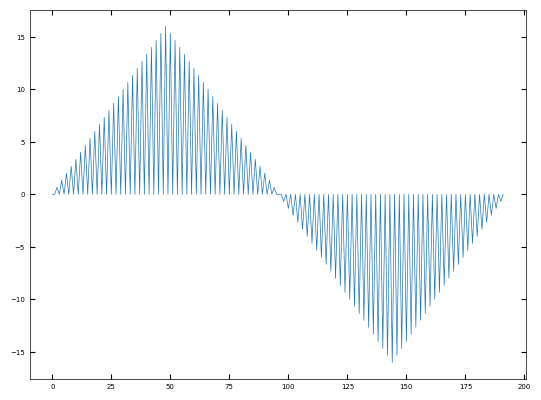

In [12]:
import matplotlib.pyplot as plt

plt.plot(dataset.hysteresis_waveform)


In [ ]:
# # Sets path to file
# path = r"./"

# # Opens the data file2
# h5_f = h5py.File(path + "data_file.h5", "r+")


# # number of pixels in the image
# num_pix = h5_f["Measurement_000"].attrs["num_pix"]
# #dataset.num_pix

# num_pix_1d = int(np.sqrt(num_pix))
# #dataset.num_pix


# # number of DC voltage steps
# voltage_steps = h5_f["Measurement_000"].attrs["num_udvs_steps"]

# proj_nd_shifted = loop_lsqf(h5_f)
# proj_nd_shifted_transposed = np.transpose(proj_nd_shifted,(1,0,2,3))

# getting parameters for the hysteresis loops
params = np.array(h5_f['params_hysteresis'][:])
params_names = ['a_0', 'a_1', 'a_2', 'a_3', 'a_4', 'b_0', 'b_1', 'b_2', 'b_3']

# voltage vector
V = np.swapaxes(np.atleast_2d(h5_f['Measurement_000']['Channel_000']['UDVS'][::2][:, 1][24:120]), 0, 1).astype(np.float64)

# to set up a type of loop_fitting function to use. Possible options: ['9 parameters', '13 parameters']
func_type = '9 parameters'

# retrieve results
real_loops = np.array(h5_f['real_loops_hysteresis'][:])
unscaled_param_trust = np.array(h5_f['predictions_hysteresis_trustregcg'][:])
unscaled_param_adam = np.array(h5_f['predictions_hysteresis_adam'][:])